In [5]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

jet = plt.cm.jet

In [36]:
def sample(n):
    return np.concatenate([
        stats.poisson.rvs(lambda_1_true, size=(n, 1)),
        stats.poisson.rvs(lambda_2_true, size=(n, 1))
    ], axis=1)
sample(2)

array([[1, 2],
       [0, 5]])

/Users/fred.shone/.pyenv/versions/jupyter3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: No contour levels were found within the data range.


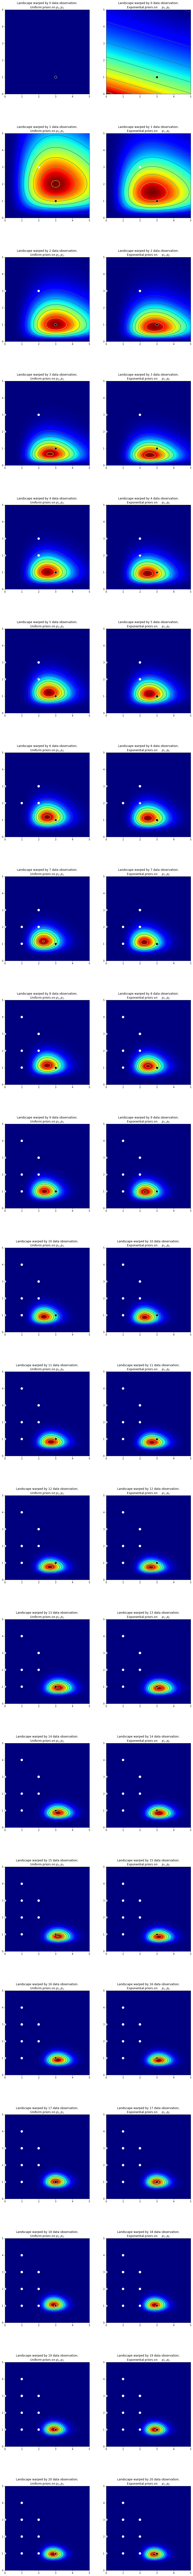

In [51]:
# create the observed data

# sample size of data we observe, trying varying this (keep it less than 100 ;)
n = 20

# the true parameters, but of course we do not see these values...
lambda_1_true = 1
lambda_2_true = 3

fig, ax = plt.subplots(n+1, 2, figsize=(14,10*n))

data = sample(0)

for N in range(n+1):

    # plotting details.
    x = y = np.linspace(.01, 5, 100)
    likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x)
                            for _x in x]).prod(axis=1)
    likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y)
                            for _y in y]).prod(axis=1)
    L = np.dot(likelihood_x[:, None], likelihood_y[None, :])


    uni_x = stats.uniform.pdf(x, loc=0, scale=5)
    uni_y = stats.uniform.pdf(x, loc=0, scale=5)
    M = np.dot(uni_x[:, None], uni_y[None, :])

    ax[N,0].contour(x, y, M * L)
    im = ax[N,0].imshow(M * L, interpolation='none', origin='lower',
                    cmap=jet, extent=(0, 5, 0, 5))
    ax[N,0].set_title("Landscape warped by %d data observation;\n Uniform priors on $p_1, p_2$." % N)
    ax[N,0].set_xlim(0, 5)
    ax[N,0].set_ylim(0, 5)
    ax[N,0].scatter(data[:,0], data[:,1], c="w", s=100, edgecolor="none")
    ax[N,0].scatter(lambda_2_true, lambda_1_true, c="k", s=100, edgecolor="w")

    exp_x = stats.expon.pdf(x, loc=0, scale=3)
    exp_y = stats.expon.pdf(x, loc=0, scale=10)
    M = np.dot(exp_x[:, None], exp_y[None, :])

    # This is the likelihood times prior, that results in the posterior.
    ax[N,1].contour(x, y, M * L)
    im = ax[N,1].imshow(M * L, interpolation='none', origin='lower',
                    cmap=jet, extent=(0, 5, 0, 5))

    ax[N,1].set_title("Landscape warped by %d data observation;\n Exponential priors on \
    $p_1, p_2$." % N)
    ax[N,1].set_xlim(0, 5)
    ax[N,1].set_ylim(0, 5)
    ax[N,1].scatter(data[:,0], data[:,1], c="w", s=100, edgecolor="none")
    ax[N,1].scatter(lambda_2_true, lambda_1_true, c="k", s=100, edgecolor="w")
    
    data = np.concatenate([data, sample(1)])

